In [1]:
%matplotlib inline
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')


In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np
import fastparquet

/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [39]:
def detect_signal(sig,wav, step=1, threshold=None):
    vTestSignal = wav.astype(np.float)
    sig=sig.astype(np.float)
    f_norm = lambda u:  np.sqrt(np.sum(u*u));
    vRefSignal = sig/f_norm( sig)

    numSamplesTestSignal    = len(vTestSignal);
    numSamplesRefSignal     = len(vRefSignal);

    vCrossCorrelationNormalizedVal  = np.zeros([numSamplesTestSignal - numSamplesRefSignal + 1, ]);

    
    for ii in range(len(vCrossCorrelationNormalizedVal)):
        if ii%step ==0:
            vTestSignalSamples                  = vTestSignal[ii : ii + numSamplesRefSignal]
            vCrossCorrelationVal             = np.sum(vTestSignalSamples * vRefSignal)
            vCrossCorrelationNormalizedVal[ii]  = vCrossCorrelationVal  / ( f_norm(vTestSignalSamples));


    if threshold is None:
        crossCorrelationNormalizedMaxIdx   = np.argmax(np.abs(vCrossCorrelationNormalizedVal));
        return crossCorrelationNormalizedMaxIdx, vCrossCorrelationNormalizedVal[crossCorrelationNormalizedMaxIdx]
    else:
        vCrossCorrelationNormalizedVal = list(enumerate(np.abs(vCrossCorrelationNormalizedVal)))
        vCrossCorrelationNormalizedVal = sorted(vCrossCorrelationNormalizedVal, key=lambda u: -u[1])
        return [u for u in vCrossCorrelationNormalizedVal if u[1]>threshold ]


In [86]:
df=fastparquet.ParquetFile("../../input/quake_0.parq").to_pandas()

In [87]:
s=df.acoustic_data.values

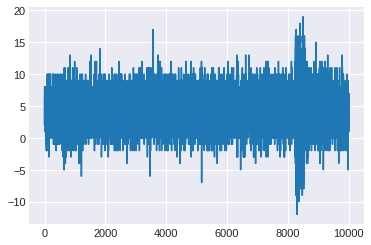

In [65]:
    plt.plot(s[28000-5000:28000+5000])


In [66]:
len(s)

44429304

In [67]:
import IPython
IPython.display.Audio(data=s[:150000],rate=14000)


In [69]:
IPython.display.Audio(data=s[150000*10:150000*11],rate=14000)

In [78]:
sw=pd.Series(s).rolling(window=700).mean()

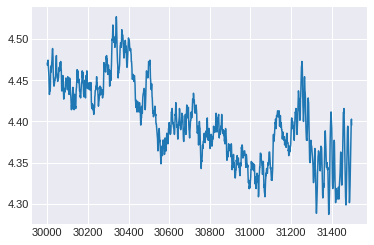

In [82]:
plt.plot(sw[1500*20:1500*21])

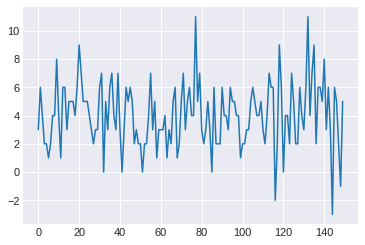

In [74]:
plt.plot(s[150*20:150*21])

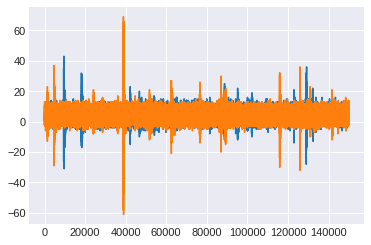

In [72]:
plt.plot(s[150000*10:150000*11])
plt.plot(s[150000*20:150000*21])

In [70]:
IPython.display.Audio(data=s[150000*20:150000*21],rate=14000)

In [68]:
IPython.display.Audio(data=s[150000*100:150000*101],rate=14000)

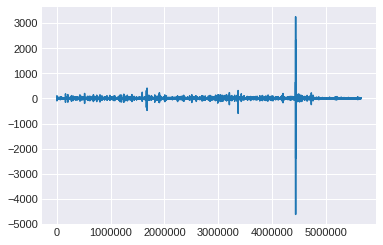

In [55]:
plt.plot(s)

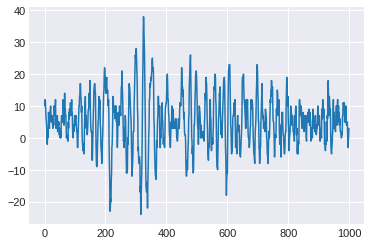

In [35]:
    plt.plot(s[28000+2000+900:28000+3900])


In [37]:
ref=s[28000+2000+900:28000+3900]
len(ref)

1000

In [172]:
i=int(np.random.random()*(len(s)-1000))
ref=s[i:i+1000]
i,i/float(len(s))

(2777831, 0.49108019997266894)

In [173]:
%%time
a=detect_signal(ref,s,step=7, threshold=0.7)

CPU times: user 22 s, sys: 260 ms, total: 22.3 s
Wall time: 21.6 s


In [174]:
len(s)

5656573

(array([1., 0., 0., 0., 1., 0., 0., 0., 0., 2.]),
 array([0.01498982, 0.06259886, 0.11020789, 0.15781693, 0.20542597,
        0.25303501, 0.30064405, 0.34825309, 0.39586212, 0.44347116,
        0.4910802 ]),
 <a list of 10 Patch objects>)

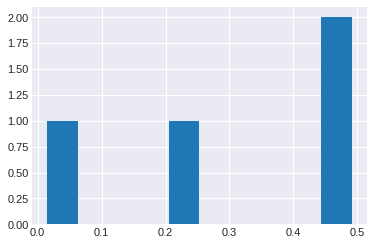

In [175]:
plt.hist([u[0]/float(len(s)) for u in a])

In [176]:
a[:10],len(a)

([(2777831, 0.9999999999999999),
  (84791, 0.7163312818907512),
  (1383746, 0.7110292022255718),
  (2691640, 0.7020520978611174)],
 4)

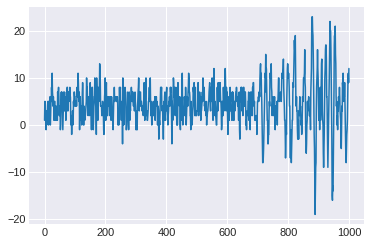

In [177]:
plt.plot(ref)

2777831 0.9999999999999999


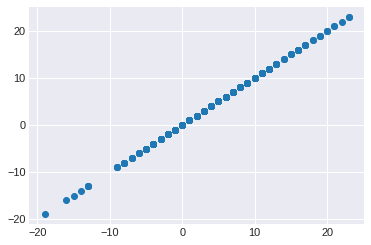

84791 0.7163312818907512


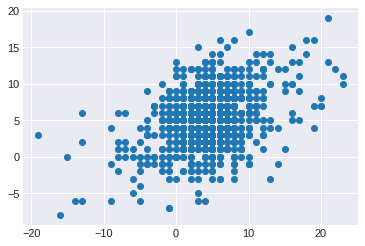

1383746 0.7110292022255718


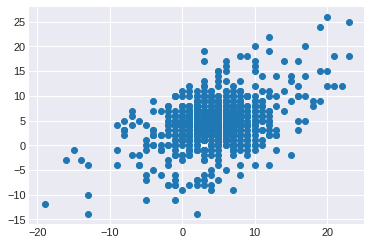

2691640 0.7020520978611174


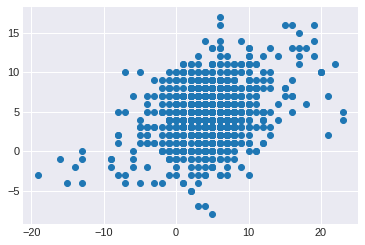

In [178]:
for i,v in a[:10]:
    print i,v
    plt.scatter(ref,s[i:i+len(ref)])
    plt.show()

2777831 0.9999999999999999


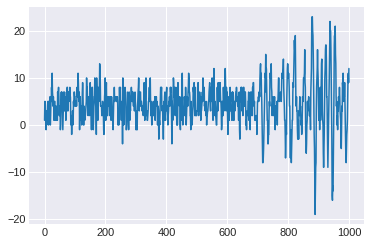

84791 0.7163312818907512


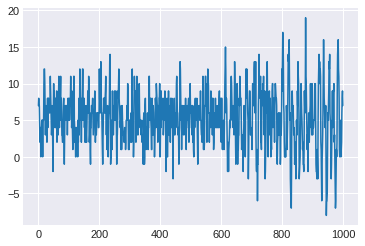

1383746 0.7110292022255718


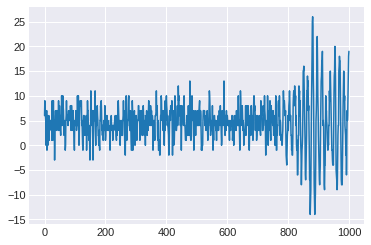

2691640 0.7020520978611174


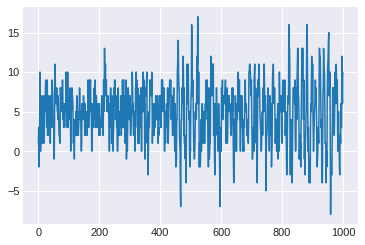

In [179]:
for i,v in a[:10]:
    print i,v
    plt.plot(s[i:i+len(ref)])
    plt.show()

In [181]:
import scipy.fftpack
a=scipy.fftpack.fft(s)

In [183]:
len(a),len(s)

(5656573, 5656573)

In [186]:
a[a>1]=0

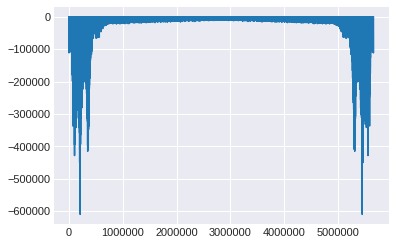

In [187]:
plt.plot(a)

In [219]:
def detect_signal2(sig,wav, step=1, threshold=None):
    vTestSignal = wav.astype(np.float)
    sig=sig.astype(np.float)
    f_norm = lambda u:  np.sqrt(np.sum(u*u));
    vRefSignal = sig/f_norm( sig)

    numSamplesTestSignal    = len(vTestSignal);
    numSamplesRefSignal     = len(vRefSignal);

    vCrossCorrelationNormalizedVal  = np.zeros([numSamplesTestSignal - numSamplesRefSignal + 1, ]);

    
    for ii in range(len(vCrossCorrelationNormalizedVal)):
        if ii%step ==0:
            vTestSignalSamples                  = vTestSignal[ii : ii + numSamplesRefSignal]
            vCrossCorrelationVal             = np.sum(vTestSignalSamples * vRefSignal)
            vCrossCorrelationNormalizedVal[ii]  = vCrossCorrelationVal  / ( f_norm(vTestSignalSamples));

    return np.abs(vCrossCorrelationNormalizedVal)


In [252]:
x=np.array([ np.sin(u*2*np.pi*3) for u in np.arange(0, 1, 1.0/1000)])

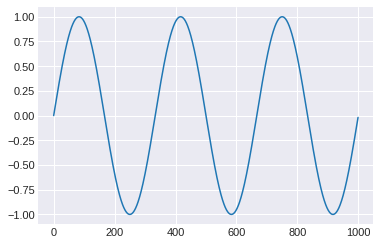

In [253]:
plt.plot(x)

In [254]:
%time a=detect_signal2(x,s,step=5)
len(a)

CPU times: user 22.1 s, sys: 60 ms, total: 22.2 s
Wall time: 22.2 s


5655574

In [255]:
len(a),a.min(),a.max()

(5655574, 0.0, 0.10214234733036853)

In [257]:
for i in range(100):
    b=a[i*150000:(i+1)*150000]
    print i, np.mean(b>0),
    b=b[b>0]
    print b.mean(),b.max()

0 0.2 0.010610484323075854 0.047898992043861506
1 0.2 0.01070067891365981 0.0687685717801567
2 0.2 0.009554926133461998 0.05260634410355663
3 0.2 0.010311803111517902 0.05785589812493664
4 0.2 0.009452392866799126 0.050636275047348356
5 0.2 0.010235163738135553 0.06312954902795154
6 0.2 0.010520577915808224 0.052003898933589573
7 0.2 0.010518549725556159 0.046621729089138295
8 0.2 0.009404226543367889 0.06264677880650406
9 0.2 0.009419513944664872 0.05256116680348841
10 0.2 0.01043252967776263 0.054017332048803005
11 0.2 0.010227562687600706 0.05850517868342516
12 0.2 0.010112733502564098 0.0575282000424742
13 0.2 0.010198470169569594 0.05272049768417808
14 0.2 0.010556476672399083 0.057738618929095376
15 0.2 0.011057850375444938 0.05910758343894151
16 0.2 0.011154048909345115 0.05795728950873998
17 0.2 0.010825817886979821 0.07856311315698976
18 0.2 0.010327016060181783 0.04631298676720294
19 0.2 0.010127434418072383 0.04681279671114441
20 0.2 0.010163458816655707 0.06031879187496282


/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: Mean of empty slice.


ValueError: zero-size array to reduction operation maximum which has no identity

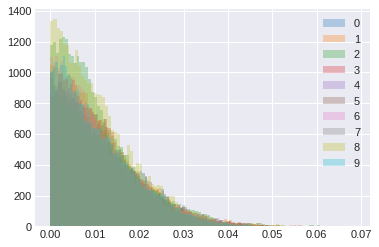

In [233]:
for i in range(10):
    b=a[i*150000:(i+1)*150000]
    b=b[b>0]
    plt.hist(b,bins=100,alpha=0.3)
    #plt.show()
plt.legend(range(10))

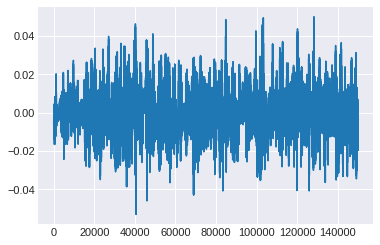

In [215]:
plt.plot(a[:150000])

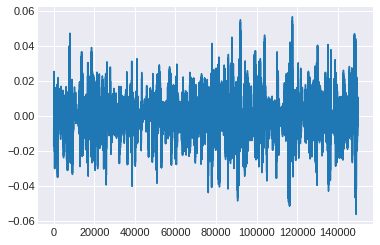

In [216]:
plt.plot(a[150000:150000*2])

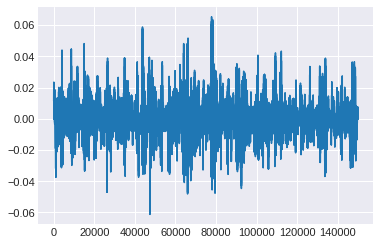

In [217]:
plt.plot(a[150000*2:150000*3])